<a href="https://colab.research.google.com/github/BlackHawk1809/TSF-GRIP-Task1/blob/main/TSP_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**### Workshop - 1: K- Means Clustering**



**ANKIT RAGHAV**
**The Sparks Foundation Task 2**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
df = pd.read_csv("Iris.csv")

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:

df.drop('Id', axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

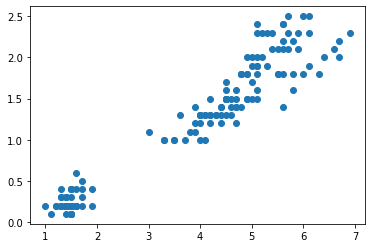

In [ ]:

plt.scatter(df.PetalLengthCm, df.PetalWidthCm)

In [ ]:
scaler= MinMaxScaler()

scaler.fit(df[['PetalLengthCm']])
df['PetalLengthCm']=scaler.transform(df[['PetalLengthCm']])

scaler.fit(df[['PetalWidthCm']])
df['PetalWidthCm']=scaler.transform(df[['PetalWidthCm']])

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,0.067797,0.041667,Iris-setosa
1,2,4.9,3.0,0.067797,0.041667,Iris-setosa
2,3,4.7,3.2,0.050847,0.041667,Iris-setosa
3,4,4.6,3.1,0.084746,0.041667,Iris-setosa
4,5,5.0,3.6,0.067797,0.041667,Iris-setosa


In [ ]:
k_range = range(1,10)
sse=[] #sum of squared error
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

In [ ]:

sse

[28.39151435836871,
 5.179687509974784,
 1.7050986081225126,
 1.1621031930971286,
 0.85708565532164,
 0.6838778258523466,
 0.5695755692202199,
 0.489402854864667,
 0.4158851730905079]

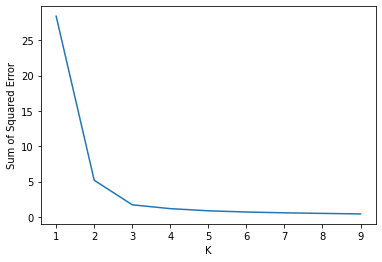

In [ ]:
plt.plot(k_range,sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.show()

In [ ]:
km = KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['PetalLengthCm','PetalWidthCm']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
df['Cluster'] = y_predicted
df.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,0.067797,0.041667,Iris-setosa,1
1,2,4.9,3.0,0.067797,0.041667,Iris-setosa,1
2,3,4.7,3.2,0.050847,0.041667,Iris-setosa,1
3,4,4.6,3.1,0.084746,0.041667,Iris-setosa,1
4,5,5.0,3.6,0.067797,0.041667,Iris-setosa,1
...,...,...,...,...,...,...,...
95,96,5.7,3.0,0.542373,0.458333,Iris-versicolor,0
96,97,5.7,2.9,0.542373,0.500000,Iris-versicolor,0
97,98,6.2,2.9,0.559322,0.500000,Iris-versicolor,0
98,99,5.1,2.5,0.338983,0.416667,Iris-versicolor,0


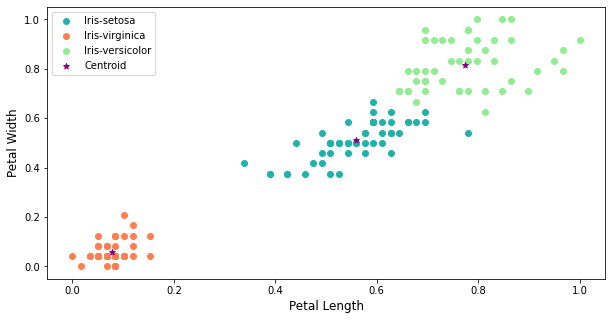

In [ ]:
df1=df[df['Cluster']==0]
df2=df[df['Cluster']==1]
df3=df[df['Cluster']==2]

plt.figure(figsize=(10,5))
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'], color='lightseagreen', label='Iris-setosa')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'], color='coral', label='Iris-virginica')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'], color='lightgreen', label='Iris-versicolor')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker="*", label='Centroid')

plt.xlabel('Petal Length', fontsize=12)
plt.ylabel('Petal Width',fontsize=12)
plt.legend()
plt.show()